## The available data are images of malwares. This scripts shows the EDA of the dataset and also shows te example of blur, noise, rotation and relative position self-supervised learning task


In [1]:
import os

import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import random

from PIL import Image, ImageFilter

import cv2
import random

from scipy import ndimage


In [2]:
root_dir = r'../'
images_dir = os.path.join(root_dir,'db')
notes_path = os.path.join(os.getcwd(), 'dataset', 'annotations')
train_labels_path = os.path.join(notes_path,'malevis_recognition_train.csv')
test_labels_path = os.path.join(notes_path,'malevis_recognition_test.csv')

In [3]:
train_df = pd.read_csv(train_labels_path,usecols=['FileName','Label','ClassName'])
test_df = pd.read_csv(test_labels_path,usecols=['FileName','Label','ClassName'])

In [4]:
labels_to_class = {0: 'Vilsel', 1: 'Androm', 2: 'Snarasite', 3: 'MultiPlug', 4: 'Hlux', 5: 'VBA', 6: 'Regrun', 7: 'Injector', 8: 'BrowseFox', 9: 'Fasong', 10: 'Allaple', 11: 'Agent', 12: 'Amonetize', 13: 'Other', 14: 'VBKrypt', 15: 'HackKMS', 16: 'Dinwod', 17: 'Adposhel', 18: 'Neshta', 19: 'Autorun', 20: 'InstallCore', 21: 'Sality', 22: 'Neoreklami', 23: 'Stantinko', 24: 'Elex', 25: 'Expiro'}
class_to_labels = {'Vilsel': 0, 'Androm': 1, 'Snarasite': 2, 'MultiPlug': 3, 'Hlux': 4, 'VBA': 5, 'Regrun': 6, 'Injector': 7, 'BrowseFox': 8, 'Fasong': 9, 'Allaple': 10, 'Agent': 11, 'Amonetize': 12, 'Other': 13, 'VBKrypt': 14, 'HackKMS': 15, 'Dinwod': 16, 'Adposhel': 17, 'Neshta': 18, 'Autorun': 19, 'InstallCore': 20, 'Sality': 21, 'Neoreklami': 22, 'Stantinko': 23, 'Elex': 24, 'Expiro': 25}

In [5]:
print(train_df.info())
print('-------------------------------------------------')
print(test_df.info())
print('--------------------------------------------------')
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7540 entries, 0 to 7539
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   FileName   7540 non-null   object
 1   Label      7540 non-null   int64 
 2   ClassName  7540 non-null   object
dtypes: int64(1), object(2)
memory usage: 176.8+ KB
None
-------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   FileName   1560 non-null   object
 1   Label      1560 non-null   int64 
 2   ClassName  1560 non-null   object
dtypes: int64(1), object(2)
memory usage: 36.7+ KB
None
--------------------------------------------------


FileName  Label ClassName
0  ../db/malevis_train/Vilsel/977b0f3ea9fcf4616d7...      0    Vilsel
1  ../db/malevis_train/Vilsel/152f15cb5ab8fde5ce2...      0    Vilsel
2  ../db/malevis_train/Vilsel/9766ffe83baf12fb825...      0    Vilsel
3  ../db/malevis_train/Vilsel/29d962851ce3b2607d4...      0    Vilsel
4  ../db/malevis_train/Vilsel/87011472817fbff5921...      0    Vilsel

### Train Data Distribution

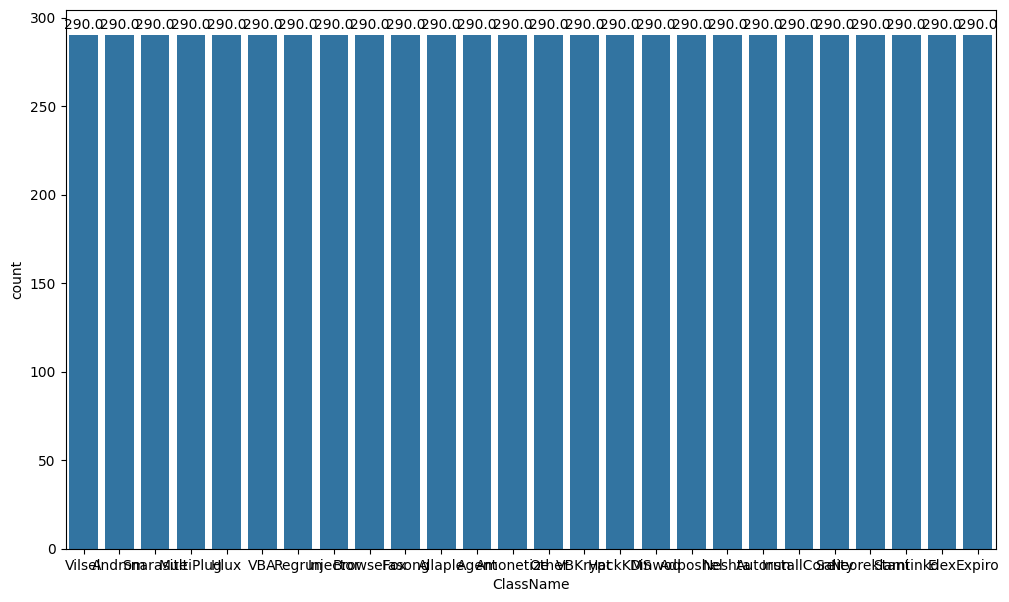

In [6]:
plt.figure(figsize=(12,7))
ax=sns.countplot(data=train_df,x='ClassName')#,hue='class_name')
#total=len(plots[i-1])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+3.5 ,
            '{}'.format(height),
            ha="center")

### Test Data Distribution

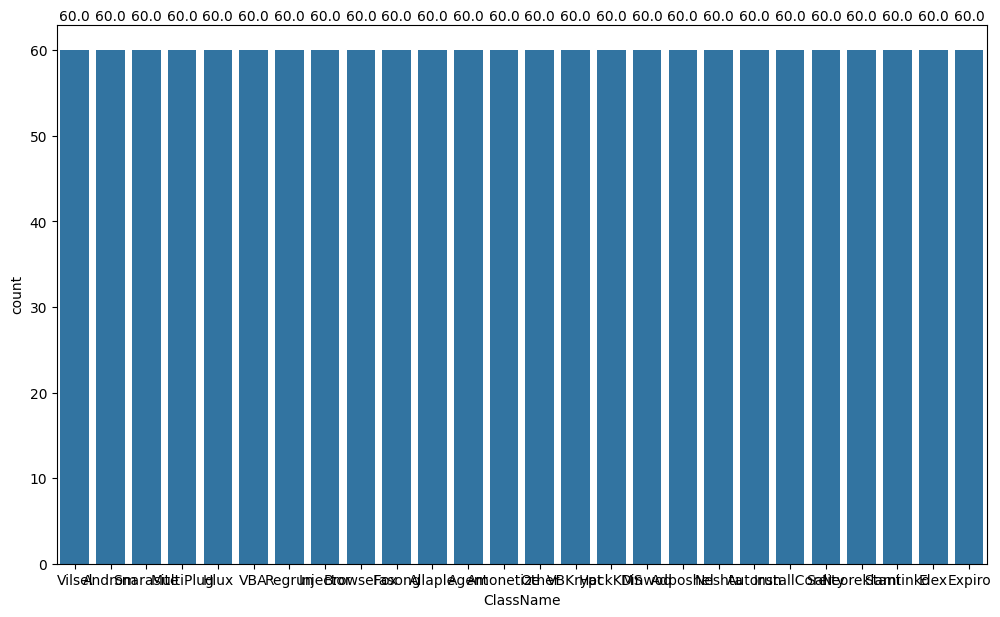

In [7]:
plt.figure(figsize=(12,7))
ax=sns.countplot(data=test_df,x='ClassName')#,hue='class_name')
#total=len(plots[i-1])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+3.5 ,
            '{}'.format(height),
            ha="center")

In [8]:
idx = random.randint(0, len(train_df))
sample = train_df.iloc[idx]
print (sample[1])

13


<module 'matplotlib.pyplot' from '/home/ivo/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

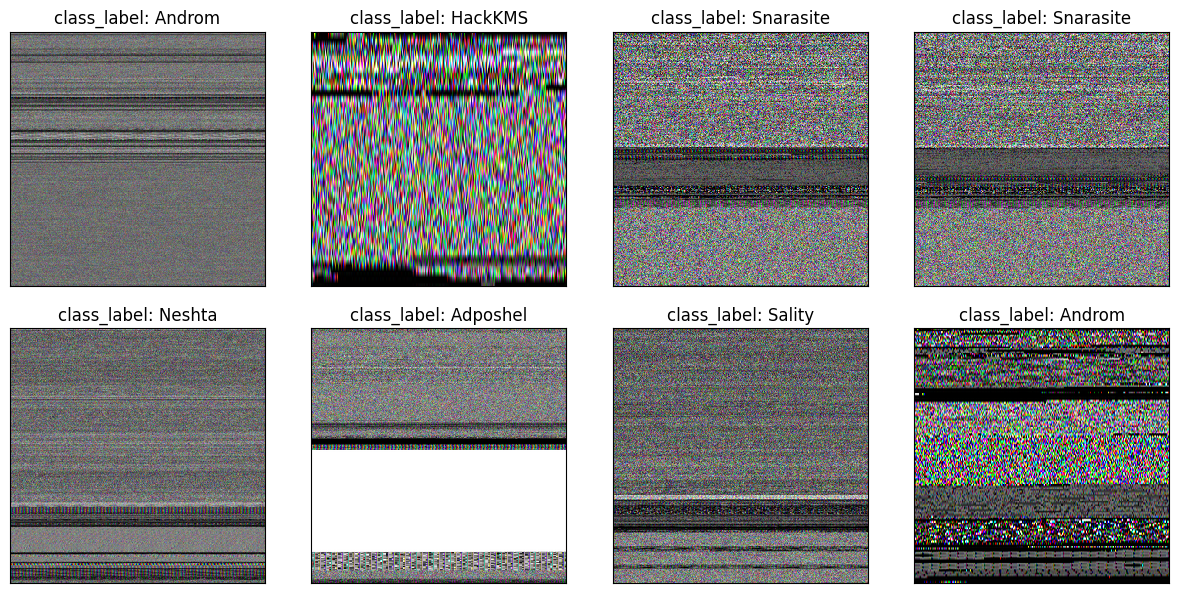

In [9]:

#### we can plot the data and see by ourselves
fig = plt.figure(1,figsize=(12,12))
for i in range(8):
  idx = random.randint(0, len(train_df))
  sample = train_df.iloc[idx]
  x = cv2.imread(sample[0])
  plt.subplot(4,4,i+1)
  plt.tight_layout()
  #x[i] = x[i][:,:,::-1] # converting BGR to RGB
  plt.imshow(x[:,:,::-1], interpolation='none')
  plt.title("class_label: {}".format(sample[2]))
  plt.xticks([])
  plt.yticks([])
plt

### When you don't have labels, create a proxy task. Example - use rotation as proxy task, the degree of rotation will be labels

In [10]:
def rotate_img(img, rot):
    if rot == 0:  # 0 degrees rotation
        return img
    elif rot == 90:  # 90 degrees rotation
        return np.flipud(np.transpose(img, (1, 0, 2)))
    elif rot == 180:  # 90 degrees rotation
        return np.fliplr(np.flipud(img))
    elif rot == 270:  # 270 degrees rotation / or -90
        return np.transpose(np.flipud(img), (1, 0, 2))
    elif rot == 120:
        return ndimage.rotate(img, 120, reshape=False)
    elif rot == 240:
        return ndimage.rotate(img, 240, reshape=False)
    else:
        raise ValueError('rotation should be 0, 90, 120, 180, 240 or 270 degrees')

In [11]:
idx = random.randint(0, len(train_df))
sample = train_df.iloc[idx]
img_0 = cv2.imread(sample[0])
#img_0 = cv2.resize(img_0,(224,224))
img_1 = rotate_img(img_0,90)
img_2 = rotate_img(img_0,120)
img_3 = rotate_img(img_0,180)
img_4 = rotate_img(img_0,240)
img_5 = rotate_img(img_0,270)
img = [img_0,img_1,img_2,img_3,img_4,img_5]
#img = np.array(img)
class_labels = ['0 - 0','90 - 1','120 - 2','180 - 3','240 - 4 ','270 - 5']

In [12]:
img[0].shape

(300, 300, 3)

<module 'matplotlib.pyplot' from '/home/ivo/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

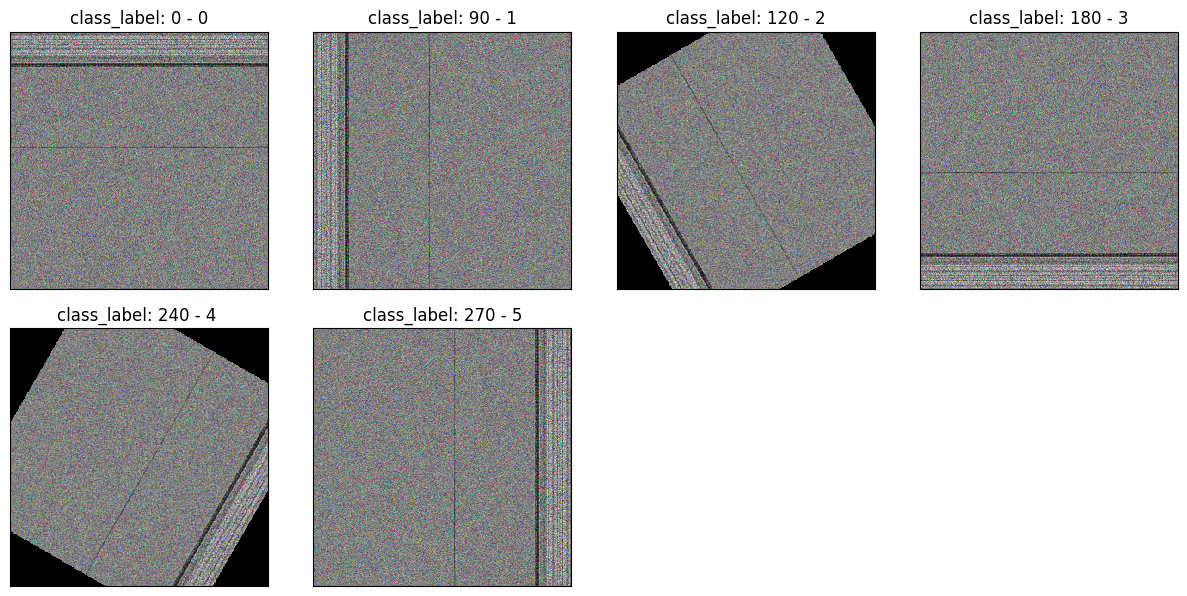

In [13]:

#### we can plot the data and see by ourselves
fig = plt.figure(1,figsize=(12,12))
for i in range(6):
  plt.subplot(4,4,i+1)
  plt.tight_layout()
  #x[i] = x[i][:,:,::-1] # converting BGR to RGB
  plt.imshow(img[i][:,:,::-1], interpolation='none')
  plt.title("class_label: {}".format(class_labels[i]))
  plt.xticks([])
  plt.yticks([])
plt

In [14]:
def relative_patch(img):
    """
    Divide a imagem em uma grade 3x3, seleciona dois patches aleatórios e retorna
    os patches com suas posições relativas.
    
    Args:
        img (PIL.Image.Image): A imagem a ser dividida em patches.
        
    Returns:
        tuple: (patch1, patch2, position1, position2)
            - patch1, patch2: as duas imagens de patch selecionadas.
            - position1, position2: as posições relativas dos patches selecionados.
    """
    
    # Converte a imagem para numpy array (se necessário)
    img_array = np.array(img)

    # Obtem as dimensões da imagem
    h, w, _ = img_array.shape

    # Calculando as dimensões dos patches (assumindo que a imagem é divisível por 3)
    patch_height = h // 3
    patch_width = w // 3
    
    # Lista de posições de todos os patches (3x3)
    patches = []
    
    for row in range(3):
        for col in range(3):
            # Corta a imagem para pegar o patch
            patch = img_array[row * patch_height : (row + 1) * patch_height,
                              col * patch_width : (col + 1) * patch_width]
            patches.append((patch, (row, col)))
    
    # Seleciona dois patches aleatórios
    patch1, position1 = patches[np.random.choice(len(patches))]
    patch2, position2 = patches[np.random.choice(len(patches))]
    
    # Converte os patches de volta para imagens PIL
    patch1 = Image.fromarray(patch1)
    patch2 = Image.fromarray(patch2)
    
    return patch1, patch2, position1, position2


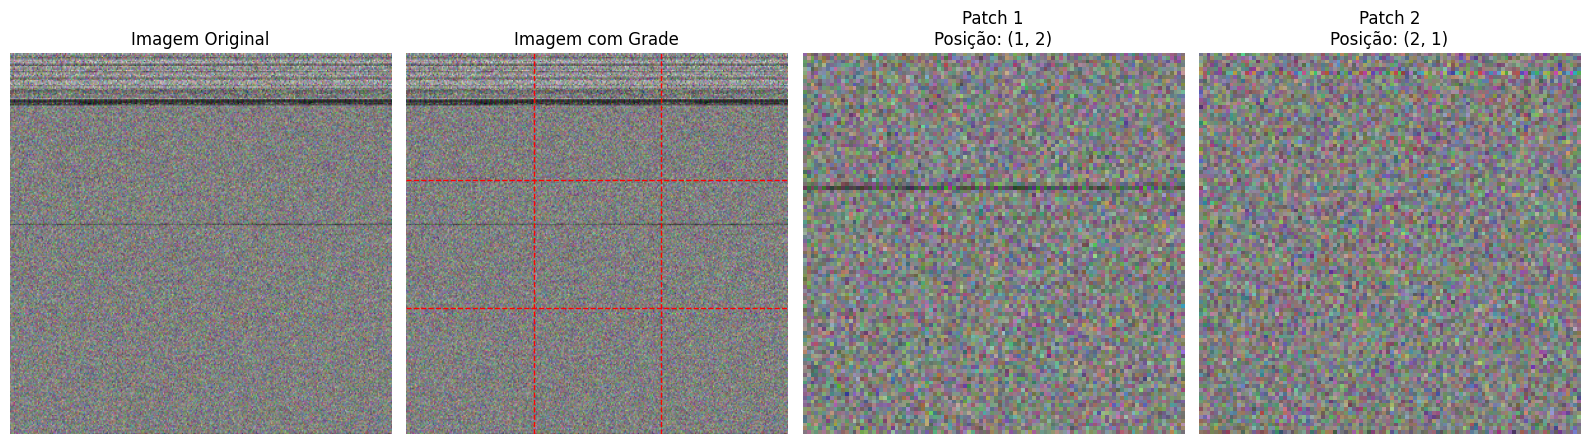

In [15]:

# Selecionar uma imagem (por exemplo, a primeira)
original_img = Image.fromarray(img[0].astype(np.uint8))

# Obter dois patches aleatórios e suas posições relativas
patch1, patch2, position1, position2 = relative_patch(original_img)

# Dimensões da imagem
h, w = np.array(original_img).shape[:2]

# Desenhar a imagem original com a grade
fig, ax = plt.subplots(1, 4, figsize=(16, 6))

# Imagem original
ax[0].imshow(np.array(original_img))
ax[0].set_title("Imagem Original")
ax[0].axis('off')

# Imagem original com a grade
ax[1].imshow(np.array(original_img))
ax[1].set_title("Imagem com Grade")
ax[1].axis('off')

# Sobrepor a grade 3x3
for i in range(1, 3):
    # Linhas horizontais
    ax[1].axhline(y=(h / 3) * i, color='red', linestyle='--', linewidth=1)
    # Linhas verticais
    ax[1].axvline(x=(w / 3) * i, color='red', linestyle='--', linewidth=1)

# Patch 1
ax[2].imshow(np.array(patch1))
ax[2].set_title(f"Patch 1\nPosição: {position1}")
ax[2].axis('off')

# Patch 2
ax[3].imshow(np.array(patch2))
ax[3].set_title(f"Patch 2\nPosição: {position2}")
ax[3].axis('off')

plt.tight_layout()
plt.show()

In [16]:
def add_gaussian_noise(img, mean=0, std=0.1):
    """ Adiciona ruído Gaussiano à imagem """
    img_array = np.array(img)
    noise = np.random.normal(mean, std, img_array.shape)
    noisy_img_array = img_array + noise
    noisy_img_array = np.clip(noisy_img_array, 0, 255)
    noisy_img = Image.fromarray(noisy_img_array.astype(np.uint8))
    return noisy_img

def add_salt_and_pepper_noise(img, amount=0.02):
    """ Adiciona ruído Sal e Pimenta à imagem """
    img_array = np.array(img)
    row, col, _ = img_array.shape
    s_vs_p = 0.5
    num_salt = int(amount * row * col * s_vs_p)
    num_pepper = int(amount * row * col * (1.0 - s_vs_p))

    # Adiciona os pixels de sal
    salt_coords = [np.random.randint(0, i-1, num_salt) for i in img_array.shape]
    img_array[salt_coords[0], salt_coords[1], :] = 1

    # Adiciona os pixels de pimenta
    pepper_coords = [np.random.randint(0, i-1, num_pepper) for i in img_array.shape]
    img_array[pepper_coords[0], pepper_coords[1], :] = 0

    noisy_img = Image.fromarray(img_array)
    return noisy_img

def add_poisson_noise(img):
    """ Adiciona ruído de Poisson à imagem """
    img_array = np.array(img)
    noisy_img_array = np.random.poisson(img_array).clip(0, 255)
    noisy_img = Image.fromarray(noisy_img_array.astype(np.uint8))
    return noisy_img

def add_speckle_noise(img, mean=0, std=0.1):
    """ Adiciona ruído Speckle à imagem """
    img_array = np.array(img)
    noise = np.random.normal(mean, std, img_array.shape)
    noisy_img_array = img_array + img_array * noise
    noisy_img_array = np.clip(noisy_img_array, 0, 255)
    noisy_img = Image.fromarray(noisy_img_array.astype(np.uint8))
    return noisy_img

def add_uniform_noise(img, low=0, high=0.1):
    """ Adiciona ruído uniforme à imagem """
    img_array = np.array(img)
    noise = np.random.uniform(low, high, img_array.shape)
    noisy_img_array = img_array + noise * 255
    noisy_img_array = np.clip(noisy_img_array, 0, 255)
    noisy_img = Image.fromarray(noisy_img_array.astype(np.uint8))
    return noisy_img

def add_random_noise(img, noise_type=None):
    """
    Aplica um ruído aleatório em uma imagem e retorna a imagem ruidosa junto com o tipo de ruído.
    
    Args:
        img (PIL.Image): A imagem original.
        noise_type (str): Tipo de ruído (se fornecido).
        
    Returns:
        PIL.Image: Imagem com ruído.
        int: Rótulo indicando o tipo de ruído aplicado (0-4).
    """
    noise_types = ['gaussian', 'salt_and_pepper', 'poisson', 'speckle', 'uniform']
    
    if noise_type is None:
        # Escolhe aleatoriamente um tipo de ruído se nenhum for especificado
        noise_type = np.random.choice(noise_types)

    if noise_type == 'gaussian':
        noisy_img = add_gaussian_noise(img)
        noise_label = 0
    elif noise_type == 'salt_and_pepper':
        noisy_img = add_salt_and_pepper_noise(img)
        noise_label = 1
    elif noise_type == 'poisson':
        noisy_img = add_poisson_noise(img)
        noise_label = 2
    elif noise_type == 'speckle':
        noisy_img = add_speckle_noise(img)
        noise_label = 3
    elif noise_type == 'uniform':
        noisy_img = add_uniform_noise(img)
        noise_label = 4
    else:
        raise ValueError(f"Unknown noise type: {noise_type}")
    
    return noisy_img, noise_label


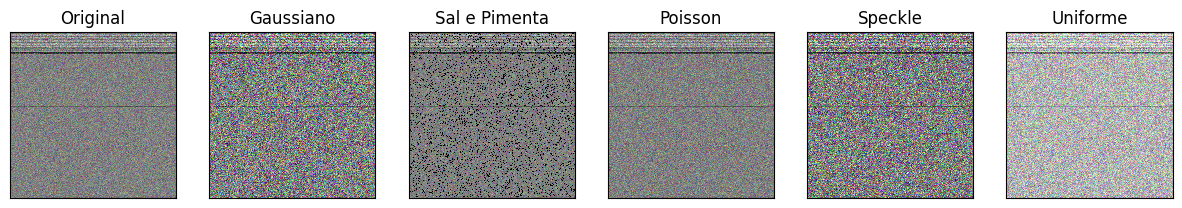

In [17]:
# Selecionar uma imagem (por exemplo, a primeira)
original_img = Image.fromarray(img[0].astype(np.uint8))

# Aplicar diferentes tipos de ruído
noisy_images = [
    add_gaussian_noise(original_img, mean=0, std=50),        # Ruído Gaussiano
    add_salt_and_pepper_noise(original_img, amount=0.1),    # Ruído Sal e Pimenta
    add_poisson_noise(original_img),                        # Ruído Poisson
    add_speckle_noise(original_img, mean=0, std=0.4),       # Ruído Speckle
    add_uniform_noise(original_img, low=0, high=0.4)        # Ruído Uniforme
]
noise_titles = [
    "Gaussiano",
    "Sal e Pimenta",
    "Poisson",
    "Speckle",
    "Uniforme"
]

# Exibir a imagem original e as versões com ruído
fig = plt.figure(figsize=(15, 5))

# Imagem original
plt.subplot(1, 6, 1)
plt.imshow(np.array(original_img), interpolation='none')
plt.title("Original")
plt.xticks([])
plt.yticks([])

# Imagens com ruídos
for j, noisy_img in enumerate(noisy_images):
    plt.subplot(1, 6, j + 2)
    plt.imshow(np.array(noisy_img), interpolation='none')
    plt.title(noise_titles[j])
    plt.xticks([])
    plt.yticks([])

plt.show()

# Obfuscation Blur

In [18]:

def add_gaussian_blur(img, radius=5):
    """ Adiciona desfoque Gaussiano (Gaussian Blur) à imagem """
    return img.filter(ImageFilter.GaussianBlur(radius))

def add_radial_blur(img, radius=5):
    """ Adiciona desfoque Radial à imagem (simulado) """
    # O Pillow não tem suporte direto para Radial Blur, mas podemos usar uma técnica de distorção simples
    # para criar um efeito similar.
    # Aqui vamos aplicar um desfoque gaussiano e depois distorcer as bordas de maneira radial.
    return img.filter(ImageFilter.GaussianBlur(radius))  # Pode ser customizado mais tarde para distorcer radialmente

def add_motion_blur(img, radius=5):
    """ Adiciona desfoque de movimento (Motion Blur) à imagem """
    # Para criar o kernel de movimento, criamos uma linha reta de coeficientes 1
    kernel = np.zeros((radius, radius))
    kernel[int(radius / 2), :] = np.ones(radius)  # Uma linha horizontal de 1s no meio
    kernel /= radius  # Normaliza para garantir que a soma dos coeficientes seja 1

    # Criar o filtro de movimento com o kernel
    motion_blur_filter = ImageFilter.Kernel(
        size=(radius, radius),
        kernel=kernel.flatten(),
        scale=1,
        offset=0
    )
    return img.filter(motion_blur_filter)

def add_box_blur(img, radius=5):
    """ Adiciona desfoque Box (Box Blur) à imagem """
    return img.filter(ImageFilter.BoxBlur(radius))

def add_surface_blur(img, radius=5, threshold=20):
    """ Adiciona desfoque de superfície (Surface Blur) à imagem """
    # Pillow não tem suporte direto para Surface Blur, então vamos simular
    # utilizando o filtro BoxBlur e ajustando o limiar para preservar as bordas.
    return img.filter(ImageFilter.BoxBlur(radius))  # Isso pode ser melhorado, mas para simplificação vamos usar BoxBlur

def add_random_blur(img, blur_type=None):
    """
    Aplica um desfoque aleatório em uma imagem e retorna a imagem desfocada.
    
    Args:
        img (PIL.Image): A imagem original.
        blur_type (str): Tipo de desfoque ('gaussian', 'radial', 'motion', 'box', 'surface').
        
    Returns:
        PIL.Image: Imagem com desfoque.
    """
    blur_types = ['gaussian', 'radial', 'motion', 'box', 'surface']
    
    if blur_type is None:
        # Escolhe aleatoriamente um tipo de desfoque se nenhum for especificado
        blur_type = np.random.choice(blur_types)

    if blur_type == 'gaussian':
        blurred_img = add_gaussian_blur(img)
    elif blur_type == 'radial':
        blurred_img = add_radial_blur(img)
    elif blur_type == 'motion':
        blurred_img = add_motion_blur(img)
    elif blur_type == 'box':
        blurred_img = add_box_blur(img)
    elif blur_type == 'surface':
        blurred_img = add_surface_blur(img)
    else:
        raise ValueError(f"Tipo de desfoque desconhecido: {blur_type}")
    
    return blurred_img


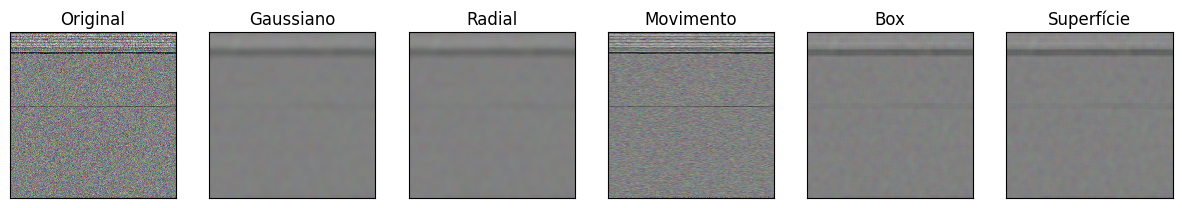

In [19]:
# Selecionar uma imagem (por exemplo, a primeira)
original_img = Image.fromarray(img[0].astype(np.uint8))

# Aplicar diferentes tipos de desfoque
blurred_images = [
    add_gaussian_blur(original_img, radius=5),          # Desfoque Gaussiano
    add_radial_blur(original_img, radius=5),            # Desfoque Radial
    add_motion_blur(original_img, radius=5),            # Desfoque de Movimento
    add_box_blur(original_img, radius=5),               # Desfoque Box
    add_surface_blur(original_img, radius=5, threshold=20)  # Desfoque de Superfície
]

blur_titles = [
    "Gaussiano",
    "Radial",
    "Movimento",
    "Box",
    "Superfície"
]

# Exibir a imagem original e as versões com desfoque
fig = plt.figure(figsize=(15, 5))

# Imagem original
plt.subplot(1, 6, 1)
plt.imshow(np.array(original_img), interpolation='none')
plt.title("Original")
plt.xticks([])
plt.yticks([])

# Imagens com desfoque
for j, blurred_img in enumerate(blurred_images):
    plt.subplot(1, 6, j + 2)
    plt.imshow(np.array(blurred_img), interpolation='none')
    plt.title(blur_titles[j])
    plt.xticks([])
    plt.yticks([])

plt.show()